In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import torch.nn as nn
from sklearn import datasets

In [14]:
#creating dataset
n_pts = 500
#notice we use noise=0.1 
#factor refers to size of two circles
X, y = datasets.make_circles(n_samples=n_pts, random_state=123, noise=0.1, factor=0.2)
x_data = torch.Tensor(X)
y_data = torch.Tensor(y.reshape(500, 1))


In [15]:
def scatter_plot():
    plt.scatter(X[y==0, 0], X[y==0, 1])
    plt.scatter(X[y==1, 0], X[y==1, 1])

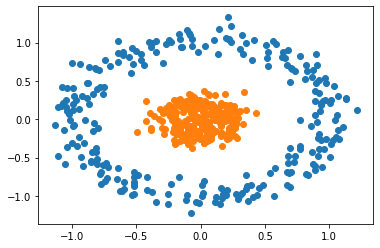

In [16]:
scatter_plot()
#inner circles class num=

In [22]:
class Model(nn.Module):
    #H1 hidden layer
    def __init__(self, input_size,H1, output_size):
        super().__init__() 
        self.linear = nn.Linear(input_size, H1)
        self.linear2 = nn.Linear(H1, output_size)
    def forward(self, x):
        x = torch.sigmoid(self.linear(x))
        x = torch.sigmoid(self.linear2(x))
        return x
    def predict(self,x):
        pred=self.forward(x)
        if pred >=0.5:
            return 1
        else:
            return 0

In [23]:
torch.manual_seed(2)
#4 is num of hidden unit layers
model = Model(2,4, 1)
print(list(model.parameters()))

[Parameter containing:
tensor([[ 0.1622, -0.1683],
        [ 0.1939, -0.0361],
        [ 0.3021,  0.1683],
        [-0.0813, -0.5717]], requires_grad=True), Parameter containing:
tensor([ 0.1614, -0.6260,  0.0929,  0.0470], requires_grad=True), Parameter containing:
tensor([[-0.1099,  0.4088,  0.0334,  0.2073]], requires_grad=True), Parameter containing:
tensor([0.2116], requires_grad=True)]


In [24]:
#here we use adam optimization,here in adam oprimization use adaptive learning rate
#I tested lr of 0.01 and there were some lags in losses plot so its small and we use 0.1 
criterion = nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.1)

In [25]:
#train
epochs = 1000
losses = []

for i in range(epochs):
    y_pred = model.forward(x_data)
    loss = criterion(y_pred, y_data)
    print("epoch:", i, "loss:", loss.item())
    losses.append(loss.item())
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

epoch: 0 loss: 0.7148522138595581
epoch: 1 loss: 0.6947318911552429
epoch: 2 loss: 0.6955163478851318
epoch: 3 loss: 0.7014891505241394
epoch: 4 loss: 0.7013983130455017
epoch: 5 loss: 0.6974702477455139
epoch: 6 loss: 0.693925678730011
epoch: 7 loss: 0.6928598284721375
epoch: 8 loss: 0.6939383149147034
epoch: 9 loss: 0.695438802242279
epoch: 10 loss: 0.6958754062652588
epoch: 11 loss: 0.6949177980422974
epoch: 12 loss: 0.6931490898132324
epoch: 13 loss: 0.6913898587226868
epoch: 14 loss: 0.6901612877845764
epoch: 15 loss: 0.6894590854644775
epoch: 16 loss: 0.6888433694839478
epoch: 17 loss: 0.6877668499946594
epoch: 18 loss: 0.6859008073806763
epoch: 19 loss: 0.6832481622695923
epoch: 20 loss: 0.6800421476364136
epoch: 21 loss: 0.6765590310096741
epoch: 22 loss: 0.6729680895805359
epoch: 23 loss: 0.6692698001861572
epoch: 24 loss: 0.6653285622596741
epoch: 25 loss: 0.6609664559364319
epoch: 26 loss: 0.6560585498809814
epoch: 27 loss: 0.6505836844444275
epoch: 28 loss: 0.64460253715515

epoch: 224 loss: 0.014526030980050564
epoch: 225 loss: 0.014433024451136589
epoch: 226 loss: 0.014341066591441631
epoch: 227 loss: 0.014250154606997967
epoch: 228 loss: 0.014160257764160633
epoch: 229 loss: 0.014071359299123287
epoch: 230 loss: 0.013983448967337608
epoch: 231 loss: 0.013896511867642403
epoch: 232 loss: 0.01381052564829588
epoch: 233 loss: 0.013725470751523972
epoch: 234 loss: 0.013641336932778358
epoch: 235 loss: 0.013558108359575272
epoch: 236 loss: 0.013475770130753517
epoch: 237 loss: 0.013394313864409924
epoch: 238 loss: 0.013313708826899529
epoch: 239 loss: 0.013233957812190056
epoch: 240 loss: 0.013155044987797737
epoch: 241 loss: 0.01307694986462593
epoch: 242 loss: 0.012999660335481167
epoch: 243 loss: 0.012923168949782848
epoch: 244 loss: 0.012847456149756908
epoch: 245 loss: 0.01277251448482275
epoch: 246 loss: 0.012698333710432053
epoch: 247 loss: 0.012624898925423622
epoch: 248 loss: 0.012552200816571712
epoch: 249 loss: 0.012480221688747406
epoch: 250 loss

epoch: 440 loss: 0.005459065083414316
epoch: 441 loss: 0.005440464708954096
epoch: 442 loss: 0.005421963054686785
epoch: 443 loss: 0.00540356757119298
epoch: 444 loss: 0.005385270342230797
epoch: 445 loss: 0.005367071367800236
epoch: 446 loss: 0.005348975770175457
epoch: 447 loss: 0.005330976564437151
epoch: 448 loss: 0.005313077010214329
epoch: 449 loss: 0.005295276176184416
epoch: 450 loss: 0.005277569871395826
epoch: 451 loss: 0.005259958561509848
epoch: 452 loss: 0.005242445506155491
epoch: 453 loss: 0.005225024651736021
epoch: 454 loss: 0.005207700654864311
epoch: 455 loss: 0.005190473515540361
epoch: 456 loss: 0.005173336714506149
epoch: 457 loss: 0.005156291648745537
epoch: 458 loss: 0.005139338318258524
epoch: 459 loss: 0.005122472532093525
epoch: 460 loss: 0.0051057059317827225
epoch: 461 loss: 0.00508902408182621
epoch: 462 loss: 0.005072432104498148
epoch: 463 loss: 0.005055928602814674
epoch: 464 loss: 0.005039514973759651
epoch: 465 loss: 0.0050231884233653545
epoch: 466 l

epoch: 654 loss: 0.0030177657026797533
epoch: 655 loss: 0.003010967280715704
epoch: 656 loss: 0.003004196099936962
epoch: 657 loss: 0.002997447969391942
epoch: 658 loss: 0.002990726148709655
epoch: 659 loss: 0.002984030172228813
epoch: 660 loss: 0.0029773609712719917
epoch: 661 loss: 0.0029707157518714666
epoch: 662 loss: 0.0029640966095030308
epoch: 663 loss: 0.002957502845674753
epoch: 664 loss: 0.0029509321320801973
epoch: 665 loss: 0.002944387961179018
epoch: 666 loss: 0.0029378689359873533
epoch: 667 loss: 0.0029313687700778246
epoch: 668 loss: 0.002924900036305189
epoch: 669 loss: 0.002918450627475977
epoch: 670 loss: 0.002912030788138509
epoch: 671 loss: 0.0029056284110993147
epoch: 672 loss: 0.002899253973737359
epoch: 673 loss: 0.0028929030522704124
epoch: 674 loss: 0.0028865747153759003
epoch: 675 loss: 0.0028802710585296154
epoch: 676 loss: 0.002873989287763834
epoch: 677 loss: 0.002867730101570487
epoch: 678 loss: 0.0028614960610866547
epoch: 679 loss: 0.002855283673852682


epoch: 866 loss: 0.0019919099286198616
epoch: 867 loss: 0.001988479169085622
epoch: 868 loss: 0.0019850516691803932
epoch: 869 loss: 0.0019816423300653696
epoch: 870 loss: 0.001978236250579357
epoch: 871 loss: 0.0019748450722545385
epoch: 872 loss: 0.0019714566878974438
epoch: 873 loss: 0.00196808367036283
epoch: 874 loss: 0.0019647141452878714
epoch: 875 loss: 0.001961357891559601
epoch: 876 loss: 0.0019580088555812836
epoch: 877 loss: 0.0019546698313206434
epoch: 878 loss: 0.0019513384904712439
epoch: 879 loss: 0.001948018791154027
epoch: 880 loss: 0.0019447051454335451
epoch: 881 loss: 0.0019414022099226713
epoch: 882 loss: 0.0019381077727302909
epoch: 883 loss: 0.0019348219502717257
epoch: 884 loss: 0.0019315441604703665
epoch: 885 loss: 0.001928274636156857
epoch: 886 loss: 0.0019250151235610247
epoch: 887 loss: 0.0019217664375901222
epoch: 888 loss: 0.0019185253186151385
epoch: 889 loss: 0.001915287459269166
epoch: 890 loss: 0.0019120641518384218
epoch: 891 loss: 0.00190885039046

Text(0.5, 0, 'epochs')

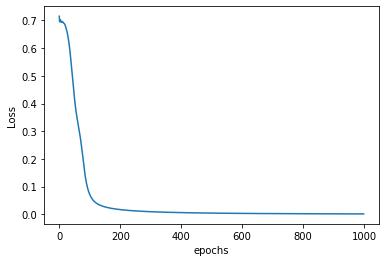

In [27]:
plt.plot(range(epochs),losses)
plt.ylabel('Loss')
plt.xlabel('epochs')

In [34]:

def plot_decision_boundary(X, y):
    x_span = np.linspace(min(X[:, 0]) -0.25, max(X[:, 0])+0.25)
    y_span = np.linspace(min(X[:, 1]) -0.25, max(X[:, 1])+0.25)
    xx, yy = np.meshgrid(x_span, y_span)
    grid = torch.Tensor(np.c_[xx.ravel(), yy.ravel()])
    pred_func = model.forward(grid)
    z = pred_func.view(xx.shape).detach().numpy()
    plt.contourf(xx, yy, z)

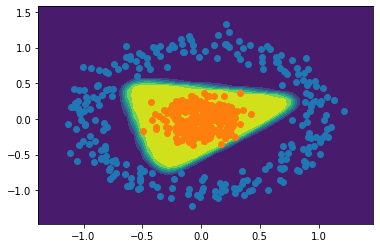

In [36]:
plot_decision_boundary(X, y)
scatter_plot()

Prediction is 1


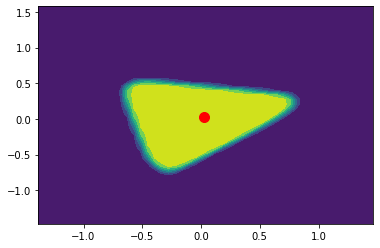

In [37]:
x = 0.025
y = 0.025
point = torch.Tensor([x, y])
prediction = model.predict(point)
plt.plot([x], [y], marker='o', markersize=10, color="red")
print("Prediction is", prediction)
plot_decision_boundary(X, y)